In [18]:
import numpy as np
import skimage
import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
!ls images/

barbara.png  boat512.gif  got.jpg  hibiscus.bmp  lena.bmp


[[[ 9 13 16]
  [ 9 13 16]
  [ 9 13 16]
  ...
  [ 9 13 16]
  [ 9 13 16]
  [ 9 13 16]]

 [[10 14 17]
  [10 14 17]
  [10 14 17]
  ...
  [10 14 17]
  [10 14 17]
  [10 14 17]]

 [[10 14 17]
  [10 14 17]
  [10 14 17]
  ...
  [10 14 17]
  [10 14 17]
  [10 14 17]]

 ...

 [[23 34 40]
  [23 34 40]
  [24 35 41]
  ...
  [10 15 18]
  [10 15 18]
  [10 15 18]]

 [[23 34 40]
  [23 34 40]
  [24 35 41]
  ...
  [10 15 18]
  [10 15 18]
  [10 15 18]]

 [[23 34 40]
  [23 34 40]
  [24 35 41]
  ...
  [10 15 18]
  [10 15 18]
  [10 15 18]]]


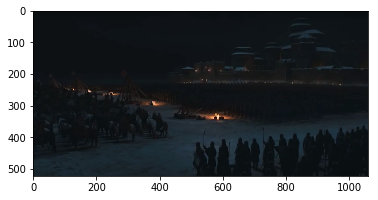

In [27]:
img = skimage.io.imread("images/got.jpg")

print(img)

plt.imshow(img)

# Partie 1 - Ajustement image / correction Gamma

### q 1.1

In [46]:
def gamma_correction(img, gamma):
    new_img = img.copy()
    new_img = skimage.img_as_float(new_img)
    new_img[:,:,0] = new_img[:,:,0]**gamma
    new_img[:,:,1] = new_img[:,:,1]**gamma
    new_img[:,:,2] = new_img[:,:,2]**gamma
    return new_img

In [48]:
fig=plt.figure(figsize=(225, 225))
i = 1
L = [0.1, 0.5, 0.9, 2, 3, 4]

for ele in L:
    fig.add_subplot(3, 2, i)
    plt.imshow(gamma_correction(img, ele))
    i += 1 
    
plt.show()

# Partie 2 - Filtrage d'images

## Partie 2-1 - filtrage dans le domaine spatial

### q 2.1.1

In [159]:
import math

def gaussian_kernel(sigma, size):
    kernel = np.zeros((size, size))
    for j in range(0, size):
        for i in range(0, size):
            kernel[i][j] = (1 / (2 * math.pi * (sigma * sigma))) * np.exp((-1) * ((i  - (size // 2))**2 + (j  - (size // 2))**2) / (2 * (sigma * sigma)))
    return kernel
    

In [160]:
gaussian_kernel(1, 3)

array([[0.05854983, 0.09653235, 0.05854983],
       [0.09653235, 0.15915494, 0.09653235],
       [0.05854983, 0.09653235, 0.05854983]])

### q 2.1.2

In [161]:
def mean_kernel(size):
    kernel = np.full((size, size), 1/size**2)
    return kernel

In [162]:
mean_kernel(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

### q 2.1.3

In [199]:
def median_kernel(size, image):
    gray_im = skimage.color.rgb2gray(image).copy()
    new_image = gray_im.copy()
    buffer = [(0,0)] * size
    image = gray_im
    width, height = im.shape
    for j in range(1, height - 1):
        for i in range(1, width - 1):
            if (i - size // 2 >= 0 and j - size // 2 >= 0 and i + size // 2 < width and j + size // 2 < height):
                buffer = image[i - size // 2 :i + size // 2,j - size // 2 : j + size // 2].flatten()
                buffer.sort()
                new_image[i, j] = buffer[size // 2]
    return new_image

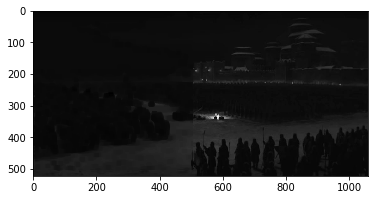

In [201]:
plt.imshow(median_kernel(15, img), cmap="gray")

### q 2.1.4

In [165]:
from scipy import ndimage

def add_filter(image, filt):
    return ndimage.convolve(image, filt, mode='constant', cval=0.0)

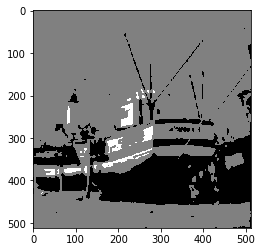

In [166]:
im = skimage.io.imread("images/boat512.gif")

plt.imshow((add_filter(im, gaussian_kernel(20, 5))), cmap='gray')

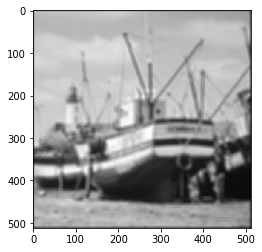

In [168]:
plt.imshow((add_filter(im, mean_kernel(10))), cmap='gray')

### q 2.1.6

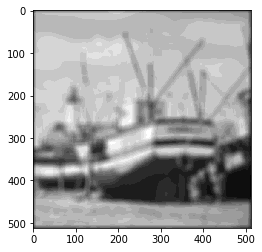

In [202]:
plt.imshow((add_filter(im, gaussian_kernel(20, 15))), cmap='gray')

# Partie 3 - Détection de contour